In [498]:
#Exploratory Data Analysis(EDA)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [499]:
train_data = pd.read_excel('Flight Prediction/Data_Train.xlsx')
train_data



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [500]:
test_data  = pd.read_excel('Flight Prediction/Test_set.xlsx')
test_data



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [501]:
print(train_data.columns)
print(test_data.columns)

#problem is the predict the price of the flight
#this has dataset has date time problem

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')


In [502]:
print(train_data['Source'].value_counts())
#almost all flights has the source Delhi Kolkata or banglore
print()
print(train_data['Destination'].value_counts())
#maximum flight are going to Cochin

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


In [503]:
print(train_data['Total_Stops'].value_counts())
print()


1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64



In [504]:
final_df = train_data.append(test_data)


/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_3136/1614548245.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = train_data.append(test_data)


In [505]:
final_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN


In [506]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [507]:
dmy = final_df['Date_of_Journey'].str.split('/').tolist()
dmy

[['24', '03', '2019'],
 ['1', '05', '2019'],
 ['9', '06', '2019'],
 ['12', '05', '2019'],
 ['01', '03', '2019'],
 ['24', '06', '2019'],
 ['12', '03', '2019'],
 ['01', '03', '2019'],
 ['12', '03', '2019'],
 ['27', '05', '2019'],
 ['1', '06', '2019'],
 ['18', '04', '2019'],
 ['24', '06', '2019'],
 ['9', '05', '2019'],
 ['24', '04', '2019'],
 ['3', '03', '2019'],
 ['15', '04', '2019'],
 ['12', '06', '2019'],
 ['12', '06', '2019'],
 ['27', '05', '2019'],
 ['6', '03', '2019'],
 ['21', '03', '2019'],
 ['3', '04', '2019'],
 ['1', '05', '2019'],
 ['6', '05', '2019'],
 ['9', '06', '2019'],
 ['1', '06', '2019'],
 ['15', '05', '2019'],
 ['18', '06', '2019'],
 ['15', '06', '2019'],
 ['18', '06', '2019'],
 ['1', '05', '2019'],
 ['6', '04', '2019'],
 ['15', '06', '2019'],
 ['18', '05', '2019'],
 ['27', '06', '2019'],
 ['21', '05', '2019'],
 ['18', '05', '2019'],
 ['06', '03', '2019'],
 ['3', '06', '2019'],
 ['21', '05', '2019'],
 ['15', '03', '2019'],
 ['18', '05', '2019'],
 ['6', '05', '2019'],
 ['

In [508]:
#from date of journey we can derive day, month and year
#This is means we are trying to create a derived feature
final_df['Date'],final_df['Month'],final_df['Year'] = final_df['Date_of_Journey'].str.split('/').tolist()[0]
final_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,24,03,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,24,03,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,24,03,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,24,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,24,03,2019
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,24,03,2019
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,24,03,2019
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,24,03,2019


In [509]:
final_df['Date'] = final_df['Date'].astype(int)
final_df['Month'] = final_df['Month'].astype(int)
final_df['Year'] = final_df['Year'].astype(int)

In [510]:
final_df = final_df.drop('Date_of_Journey', axis=1)


In [511]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,24,3,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,24,3,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,24,3,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,24,3,2019


In [512]:
final_df['Arrival_Time'] = final_df['Arrival_Time'].str.split(' ').str[0]
final_df.head()


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,24,3,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,24,3,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,24,3,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,24,3,2019


In [513]:
final_df['Arrival_hour'] = final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_min'] = final_df['Arrival_Time'].str.split(':').str[1]

final_df['Arrival_hour'] = final_df['Arrival_hour'].astype(int)
final_df['Arrival_min'] = final_df['Arrival_min'].astype(int)

final_df = final_df.drop('Arrival_Time', axis=1)

final_df.head(1)


,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10


In [514]:
final_df['Dep_Time'] = final_df['Dep_Time'].str.split(' ').str[0]

final_df['dep_hour'] = final_df['Dep_Time'].str.split(':').str[0]
final_df['dep_min'] = final_df['Dep_Time'].str.split(':').str[1]

final_df['dep_hour'] = final_df['dep_hour'].astype(int)
final_df['dep_min'] = final_df['dep_min'].astype(int)

final_df = final_df.drop('Dep_Time', axis=1)
final_df.head(1)


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20


In [515]:
final_df['Total_Stops'].unique()

final_df['Total_Stops']=final_df['Total_Stops'].str.split(' ').str[0]
final_df = final_df.replace('non-stop', 0)


mode_stops = final_df['Total_Stops'].mode()[0]

final_df['Total_Stops'] = final_df['Total_Stops'].fillna(mode_stops)

final_df['Total_Stops'].isnull().sum()
final_df['Total_Stops'] = final_df['Total_Stops'].astype(int)


final_df = final_df.drop('Route', axis=1)
final_df.head(1)



,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897.0,24,3,2019,1,10,22,20


In [516]:
hrs = final_df['Duration'].str.split(' ').str[0].str[0].astype(int)
hrs

mins = final_df['Duration'].str.split(' ').str[1].str.split('m').str[0]
mins = mins.fillna(30)
mins

mins.isnull().sum()
final_df['Duration'] = hrs*60 + mins.astype(int)

final_df.head(1)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,170,0,No info,3897.0,24,3,2019,1,10,22,20


In [519]:
from sklearn.preprocessing import LabelEncoder

Labelencoder = LabelEncoder()
final_df['Airline']=Labelencoder.fit_transform(final_df['Airline'])
final_df['Source']=Labelencoder.fit_transform(final_df['Source'])
final_df['Destination']=Labelencoder.fit_transform(final_df['Destination'])
final_df['Additional_Info']=Labelencoder.fit_transform(final_df['Additional_Info'])

final_df.head(1)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,dep_hour,dep_min
0,3,0,5,170,0,8,3897.0,24,3,2019,1,10,22,20


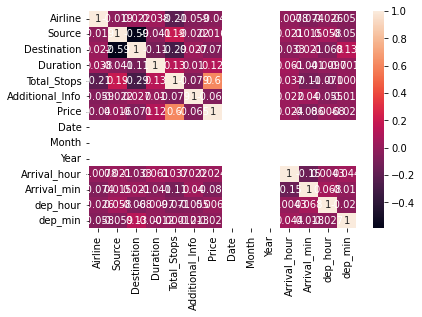

In [521]:
grp = sns.heatmap(final_df.corr(), annot=True)
plt.show()